In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

### Step 1: Reading and understanding the data

In [336]:
# Load the data
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [337]:
# Checking the Rows and Columns
# Checking the shape of the dataset.
housing.shape

(1460, 81)

In [338]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [339]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [340]:
# Null percentage
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [341]:
# Checking the unique values in the dataset
housing.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
PoolArea            8
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
RoofStyle           6
Foundation

In [342]:
# Checking the columns
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [343]:
# Checking for all the null rows
housing.isnull().all(axis=1).sum()

# No null values in the rows

0

In [344]:
# Checking for duplicate enteries in rows:
# Check for duplicate rows
duplicate_rows = housing.duplicated()

(duplicate_rows > 0).sum()

# All the rows are unique.

0

In [345]:
# Splitting data into numerical and categorical features separately for better analysis.
# Numerical features
num_features = housing.select_dtypes(include=['int64', 'float64'])
# Catagorical features
cat_features = housing.select_dtypes(include=['object'])

### Step 2: Analysizing Numerical features

In [346]:
num_features

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          NaN    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          NaN    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          NaN     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20          NaN     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60          NaN    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

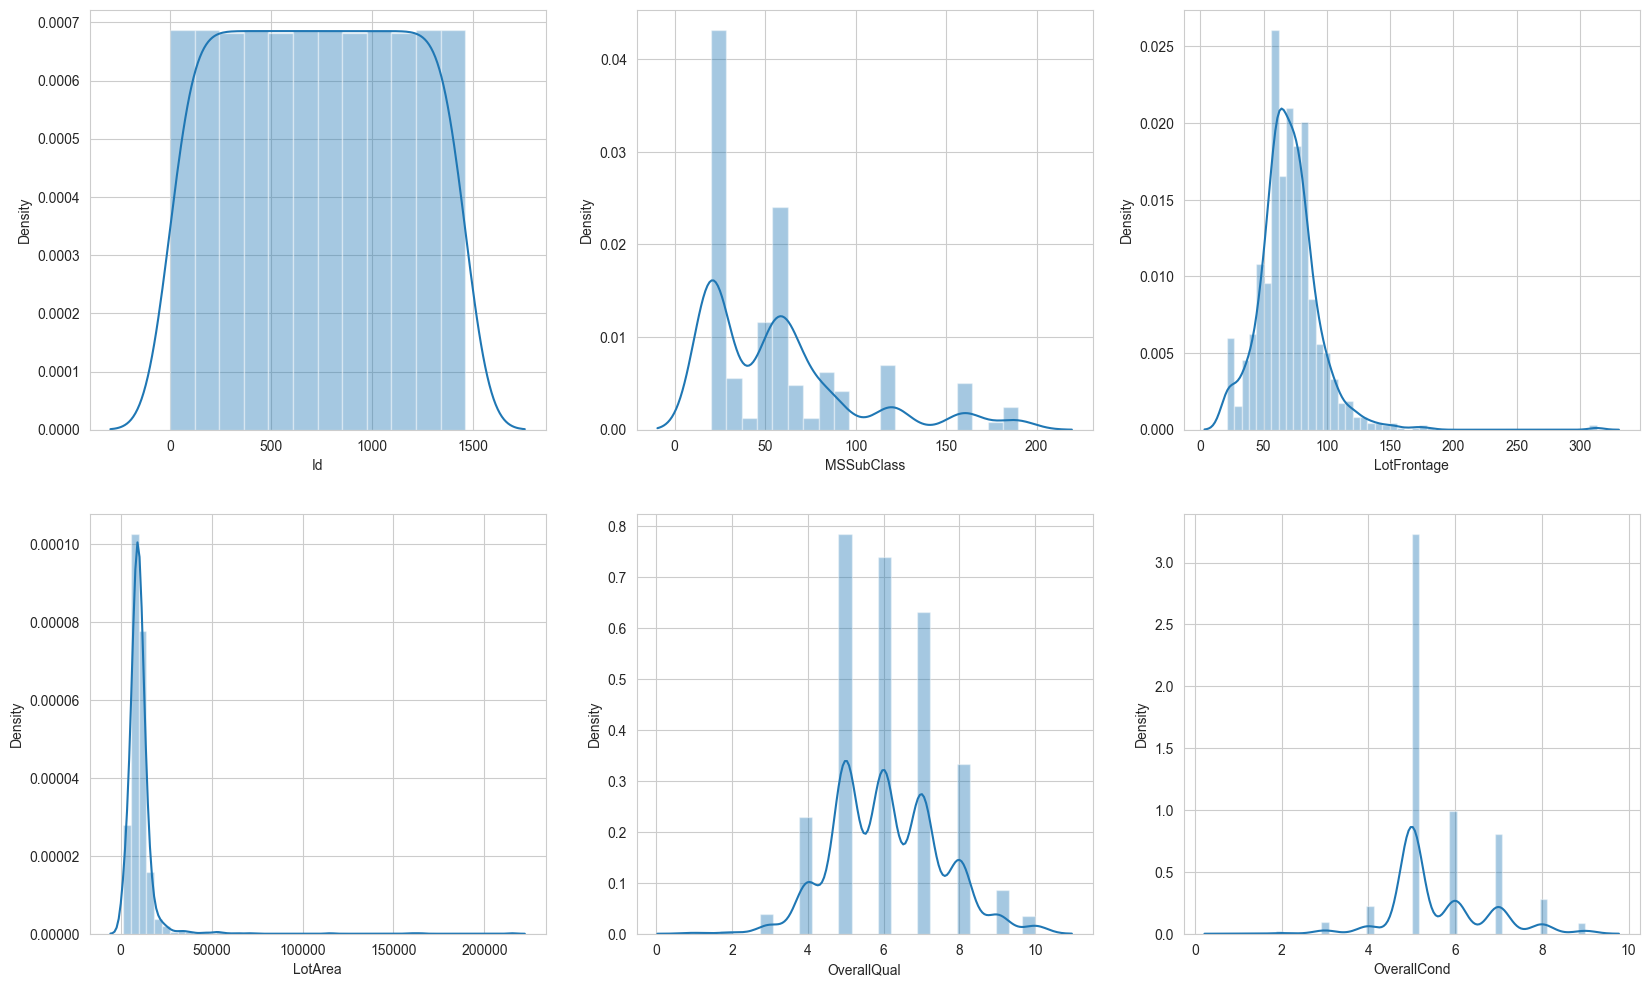

In [347]:
# Checking the distribution of the numerical features
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.distplot(housing['Id'])
plt.subplot(2, 3, 2)
sns.distplot(housing['MSSubClass'])
plt.subplot(2, 3, 3)
sns.distplot(housing['LotFrontage'])
plt.subplot(2, 3, 4)
sns.distplot(housing['LotArea'])
plt.subplot(2, 3, 5)
sns.distplot(housing['OverallQual'])
plt.subplot(2, 3, 6)
sns.distplot(housing['OverallCond'])
plt.show()


Observations
1. Id is a unique identifier and is not useful for analysis.
2. MSSubClass is a categorical feature and should be treated as such.
3. LotFrontage and LotArea are right skewed.
4. OverallQual and OverallCond are ordinal features.

In [348]:
outliers_percentage={}

for feature in num_features.columns:
    IQR=num_features[feature].quantile(.75) - num_features[feature].quantile(.25)
    outliers_count=num_features[(num_features[feature]>(num_features[feature].quantile(.75)+1.5*IQR)) | (num_features[feature]<(num_features[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/num_features.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

Observations
Majority of numerical features have outliers.
IQR method is used to detect outliers, which is a inter quartile range = difference between 75th and 25th percentile.
Dropping all the columns with outliers can cause problems.
Hence, we are reassigning them with their IQR range with min and max values.

In [349]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25)
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] > max_value] = max_value
        housing[feature][housing[feature] < min_value ] = min_value

In [350]:
# Checking dataset after imputing outliers
housing.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

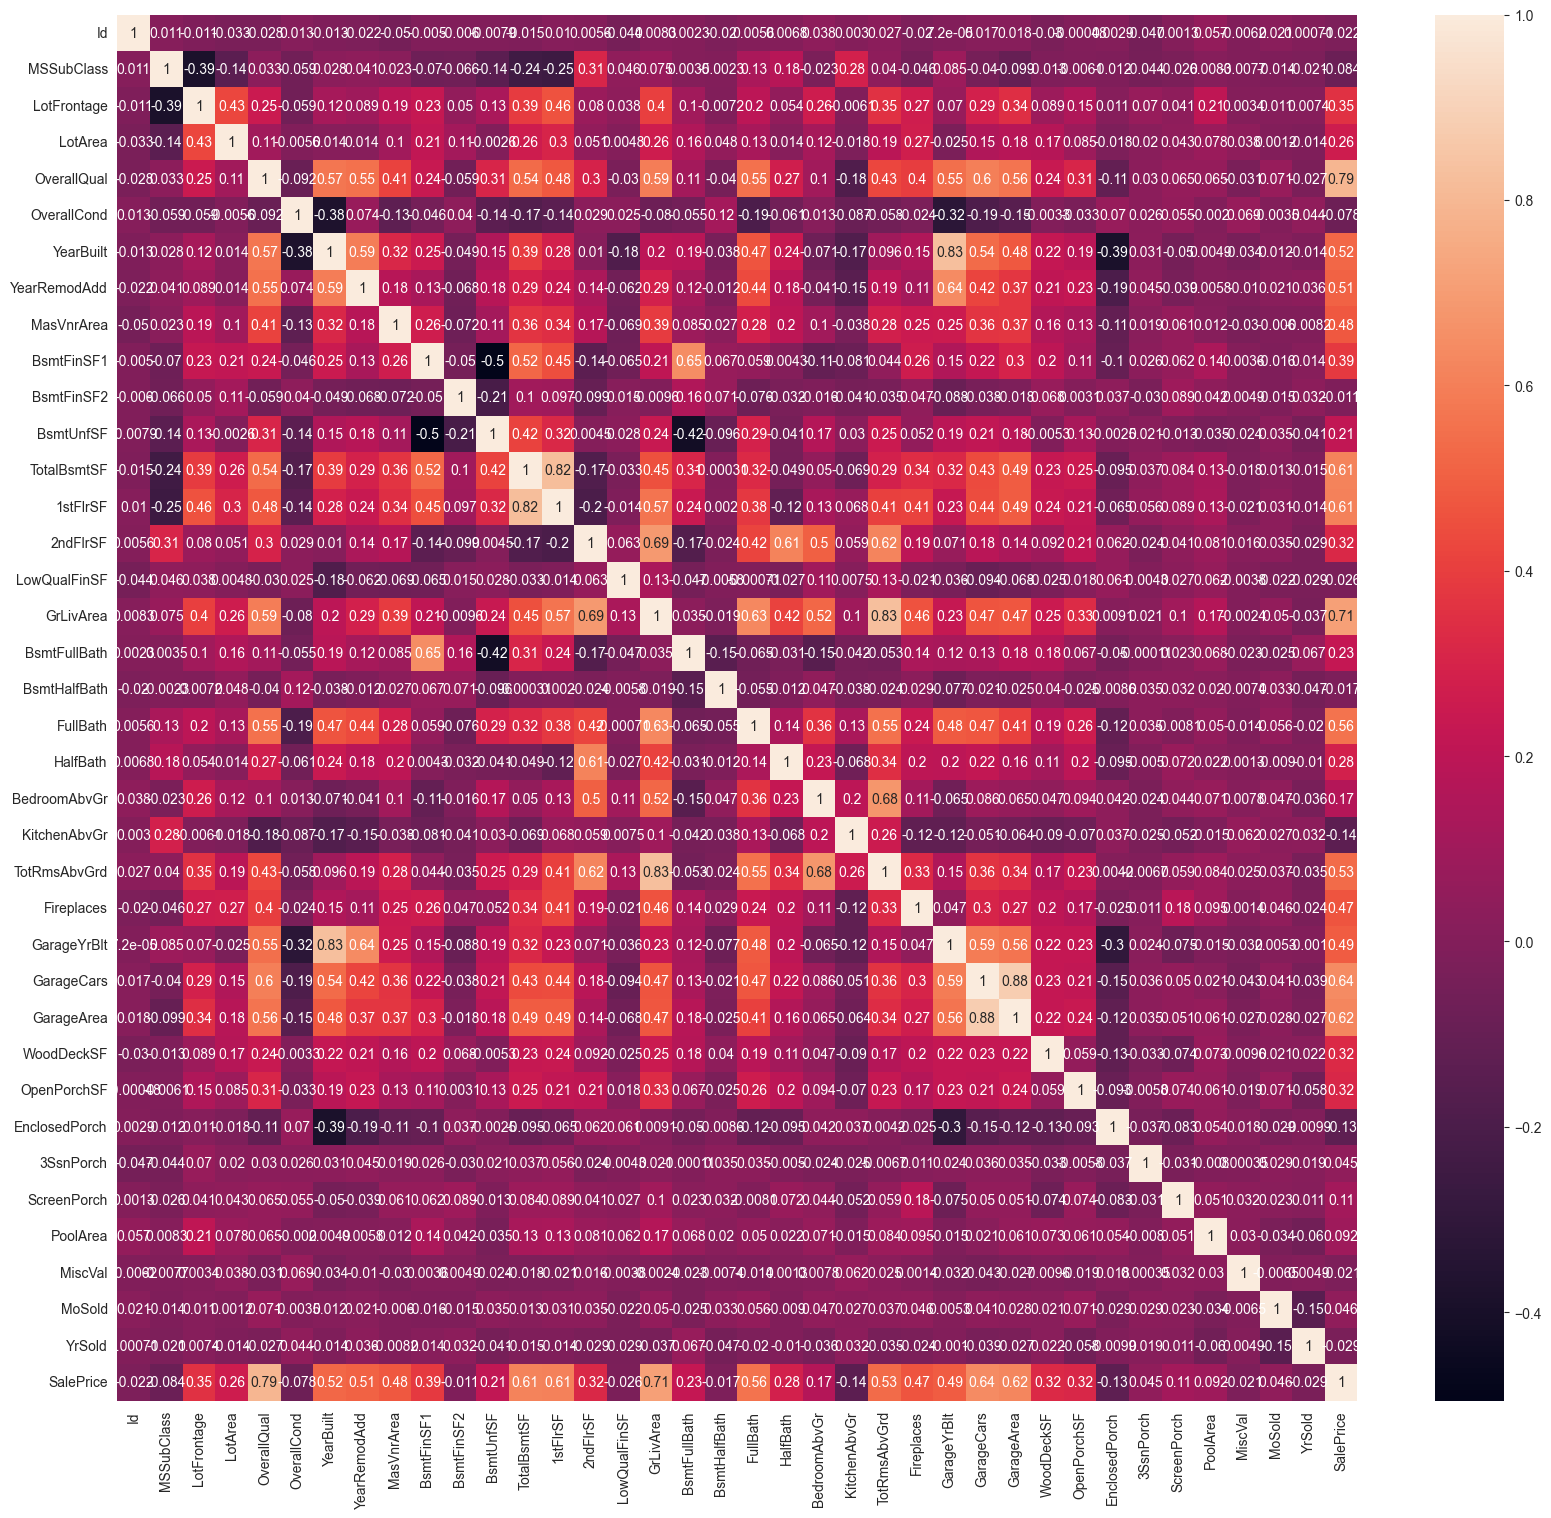

In [351]:
# Getting correlation of numerical features with target variable
plt.figure(figsize=(20,18))
sns.heatmap(num_features.corr(), annot=True)
plt.show()


Observations
Some of the features have very high correlation. like, GarageYrBlt and YearBuilt, GrLivArea and TotRmsAbvGrd, GarageCars and GarageArea and TotalBsmtSF and 1stFlrSF.
Some of the features can be dropped easily.

Visualizing numeric features with continous target variable

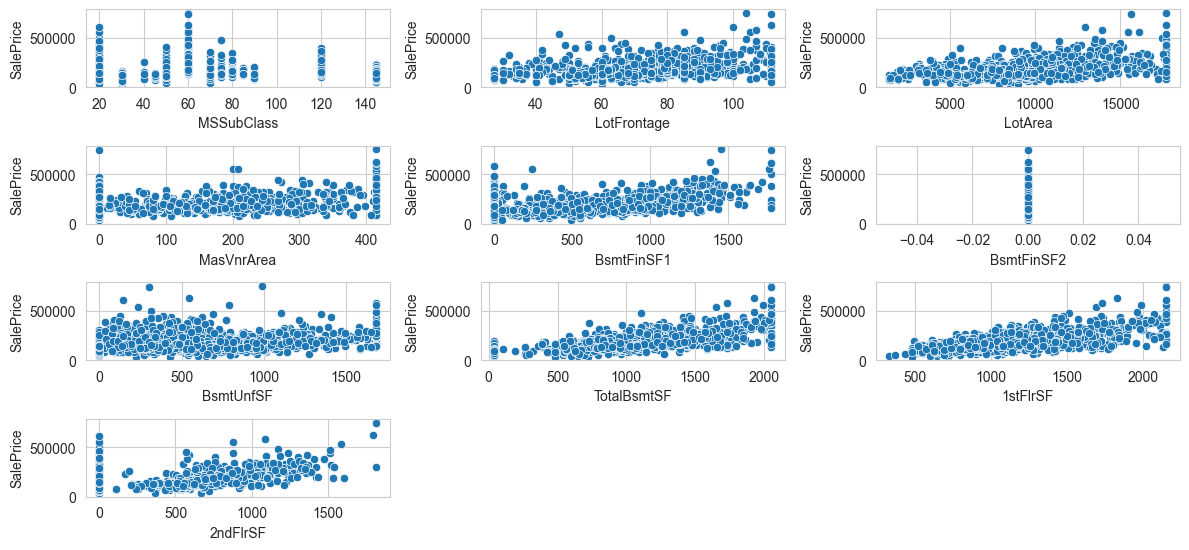

In [352]:
plt.figure(figsize=(12, 12))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing[feature], y=housing['SalePrice'], data=housing)
    plt.tight_layout()


Observations:
1. LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF are right skewed.
2. LotFrontage, BsmtFinSF2 have no correlation with SalePrice.

Visualizing numeric features with ordinal target variable

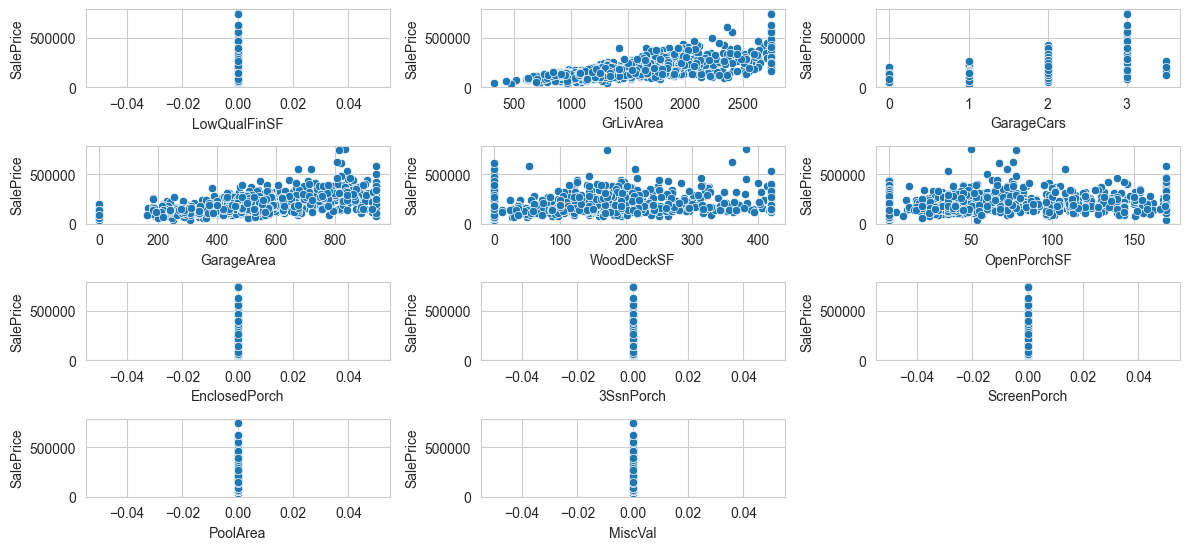

In [353]:
plt.figure(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing[feature], y=housing['SalePrice'], data=housing)
    plt.tight_layout()


Observations:
1. GrivlArea and GarageArea have a linear relationship with SalePrice.
2. Rest of the features have no correlation with SalePrice, and can be dropped.

Analysing the distribution of numerical features.

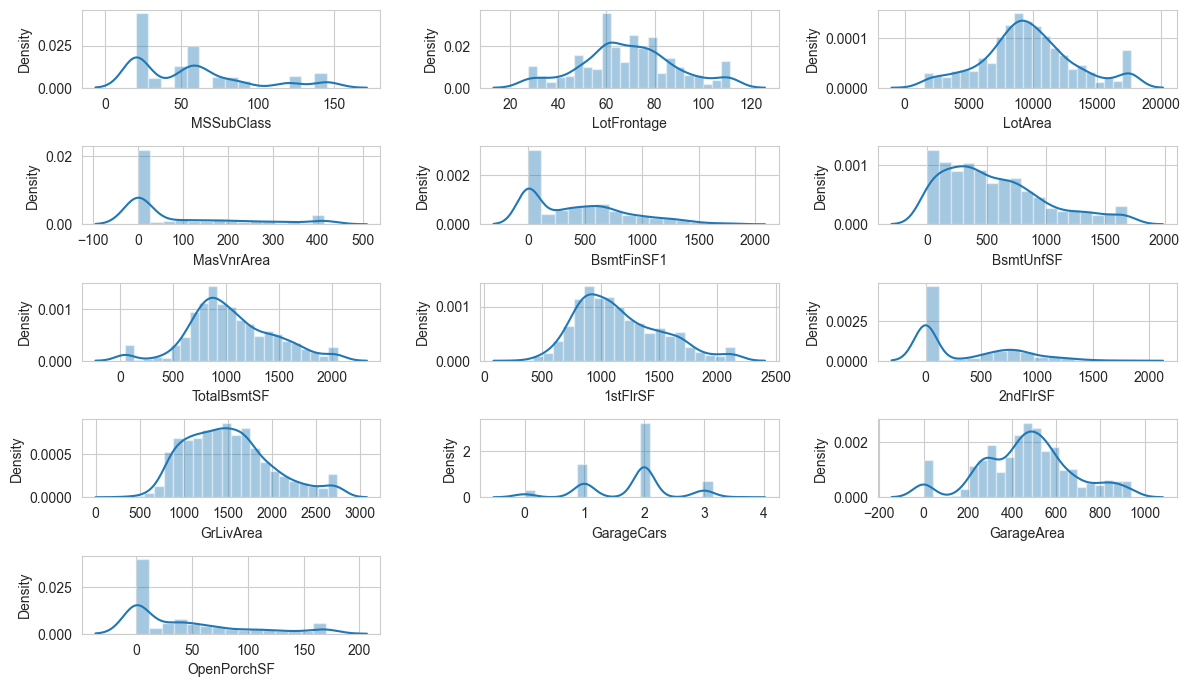

In [354]:
plt.figure(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing[feature])
    plt.tight_layout()

In [355]:
# Dropping the columns with no correlation with SalePrice
housing.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [356]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

Analyzing numerical features with discrete values.

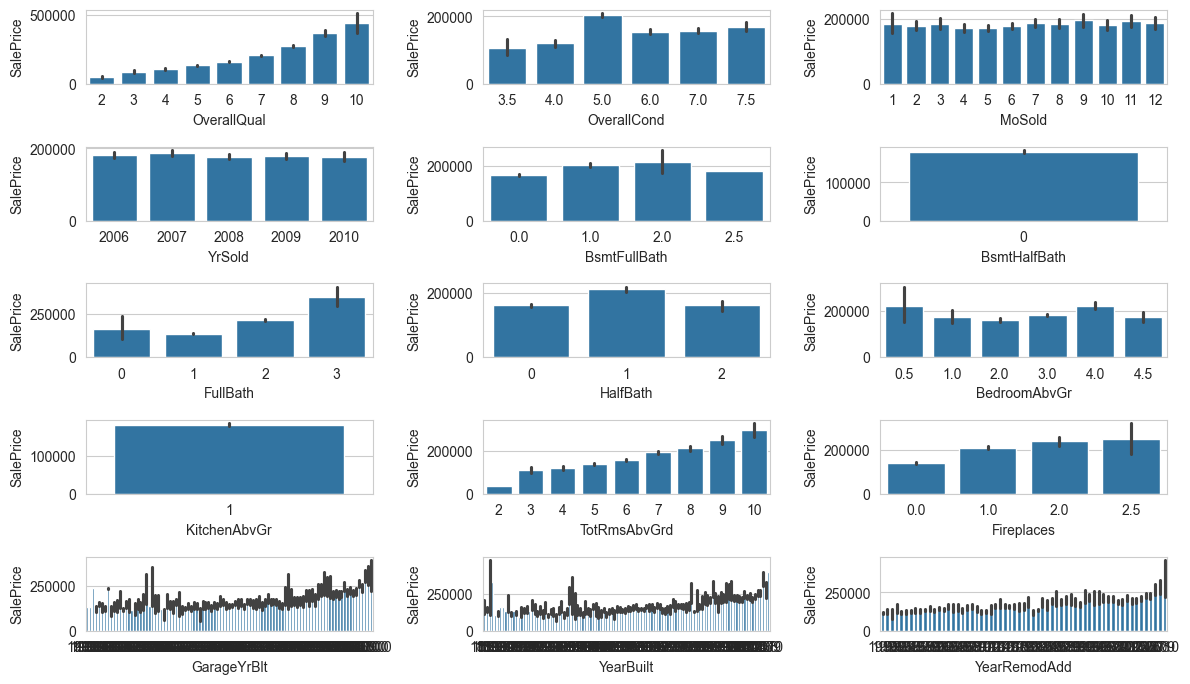

In [357]:
plt.figure(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing[feature], y=housing['SalePrice'])
    plt.tight_layout()

Observations:
1. OverallQual has positive relationship with SalesPrice. More the quality, more the price.
2. OverallCond has negative relationship with SalesPrice. More the condition, less the price.
3. Salesprice is high at 5 OverallCond.
4. MoSold and YrSold have no correlation with SalesPrice, doesn't shows strong relationship.
5. TotRmsAbvGrd has positive relationship with SalesPrice, more the grade, more the price.
6. GarageYrBlt, YearBuilt, YearRemodAdd and YrSold can be used to extract new features to identify the trend.

In [358]:
print(housing['BsmtFullBath'].value_counts())
print(housing['KitchenAbvGr'].value_counts())

BsmtFullBath
0.0    856
1.0    588
2.0     15
2.5      1
Name: count, dtype: int64
KitchenAbvGr
1    1460
Name: count, dtype: int64


In [359]:
# dropping KitchenAbvGr for not having useful information
housing.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [360]:
for feat in housing.select_dtypes(exclude=['object']).columns:
    if housing[feat].isnull().any():
        print(feat, ' : ',  round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [361]:
# Since MasVnrArea has 1% missing value, we can drop null values as it is very less.
# Since ID has no correlation with SalePrice, we can drop it.
housing.drop(['Id'], axis=1, inplace=True)
housing = housing[~housing['MasVnrArea'].isnull()]

In [362]:
# Checking the shape of the dataset after dropping the columns
housing.shape

(1452, 73)

In [363]:
# Since GarageCars and GarageArea have high correlation, we can drop GarageCars.
# Since we have analysis some of the features have high correlation with each other, so we can easily drop them.
housing.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing.columns.shape)

(69,)


### Step 3: Analysing Categorical features

In [364]:
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [365]:
# Null percentage
for feat in housing.select_dtypes(include=['object']).columns:
    if housing[feat].isnull().any():
        print(feat, ' : ',  round(housing[feat].isnull().sum()/housing.shape[0], 2)*100)

Alley  :  94.0
MasVnrType  :  60.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


As mentioned in the data description, we can replace the missing values of the below columns:
Alley: NA means no alley access
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: NA means no basement
FireplaceQu: NA means no fireplace
GarageType, GarageFinish, GarageQual, GarageCond: NA means no garage
MiscFeature: NA means no miscellaneous feature
All these featues can be imputed with meaninful values.

In [366]:
catgorical_features_with_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MiscFeature']
for feat in catgorical_features_with_na:
    housing[feat].fillna('Not_applicable', inplace=True)

print(housing[catgorical_features_with_na].isnull().sum())


Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
MiscFeature     0
dtype: int64


In [367]:
housing['Electrical'].isnull().sum()

1

In [368]:
housing['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [369]:
# Dropping PoolQC with very high number of null values, and dropping rows of electical for very low missing value count.
housing.drop(['PoolQC'], axis=1, inplace=True)
housing.dropna(subset=['Electrical'], inplace=True)

In [370]:
# Checking the shape of the dataset after dropping the columns
housing.columns.shape

(68,)

In [371]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    plt.figure(figsize=(12, 12))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(x=housing['SalePrice'], y=housing[feature])
        plt.tight_layout()

Analyzing ordered categorical features

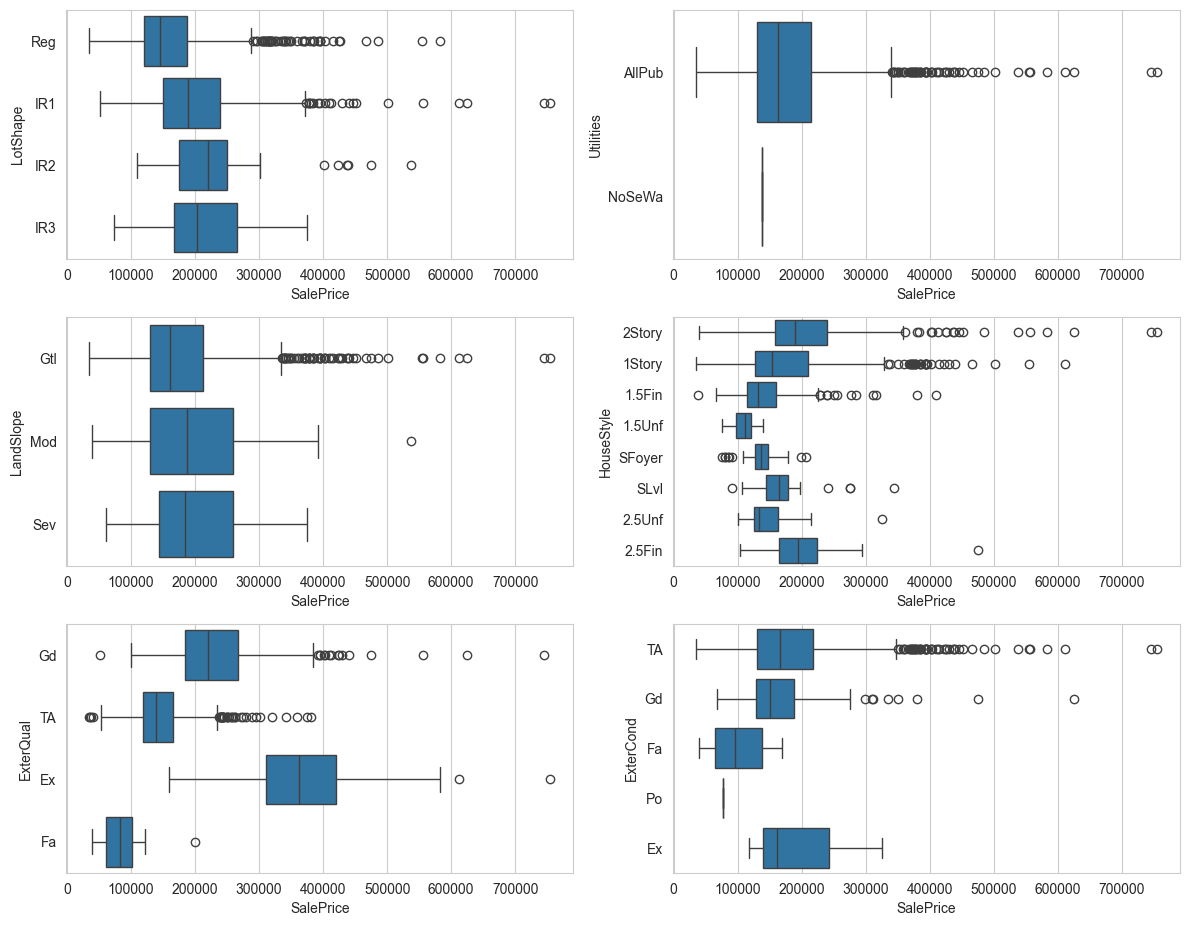

In [372]:
external_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
generate_boxplot(external_features)


Observations:
1. LotShape: Regular and Irregular have higher SalePrice.
2. Utilities: AllPub has higher SalePrice.
3. LandSlope: Houses at severe land slopes have lower prices.
4. HouseStyle: 1Story and 2Story have higher SalePrice.
5. ExterQual: Houses with excellent external quality has higher SalePrice.
6. ExterCond: Houses with excellent external condition has higher SalePrice.

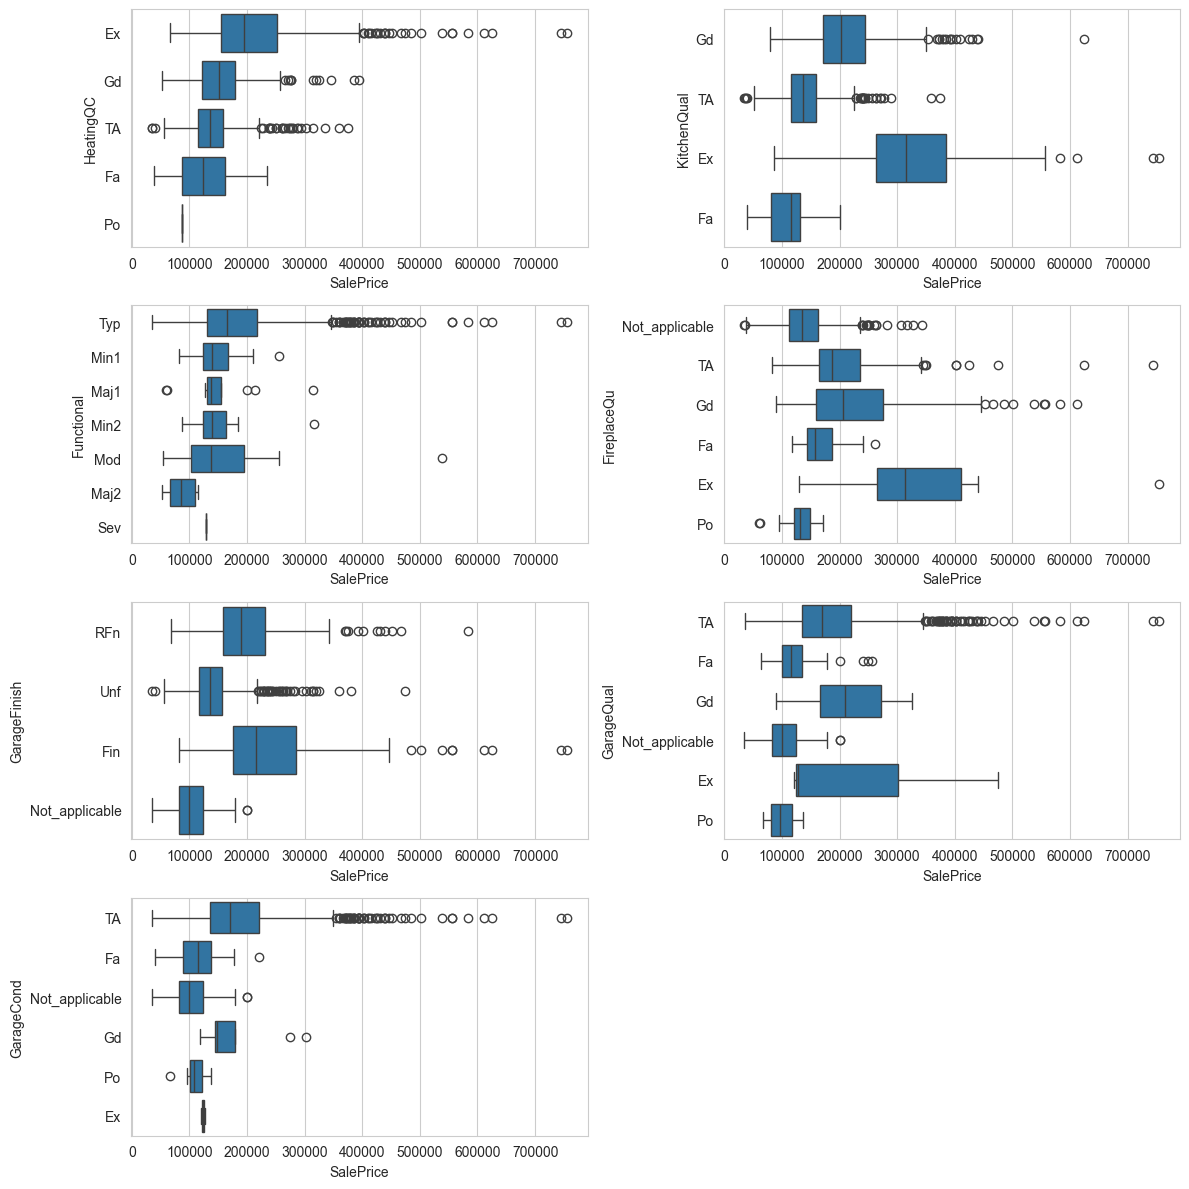

In [373]:
internal_features = ['HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']
generate_boxplot(internal_features)

Observations:
1. HeatingQC: Houses with excellent heating quality has higher SalePrice.
2. KitchenQual: Houses with excellent kitchen quality has higher SalePrice.
3. Functional: Houses with typical functionality has higher SalePrice. There are very few houses with minor deductions.
4. FireplaceQu: SalePrices range in largest for houses with average fireplace quality.
5. GarageFinish: Houses with finished garage has higher SalePrice.
6. GarageQual: The range of SalePrice is largest for houses with average garage quality.
7. GarageCond: There are very few houses with excellent garage condition.

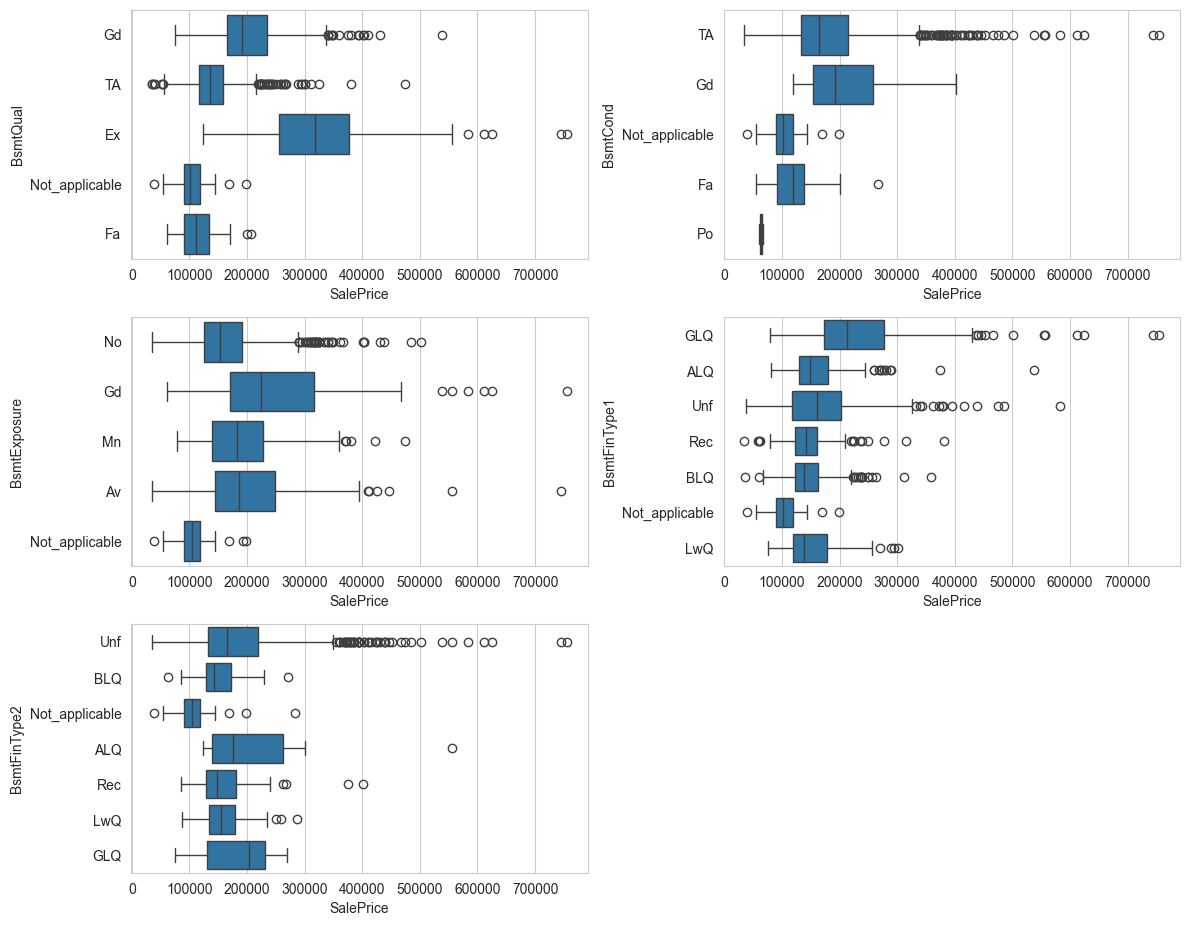

In [374]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

Observations:
1. BsmtQual: Houses with excellent basement quality has higher SalePrice.
2. Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
3. A lot of houses have unfinished basment or no basement (label = Not_applicable)

Encoding the categorical features

In [375]:
housing['LotShape'] = housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing['Utilities'] = housing['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['HouseStyle'] = housing['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing['ExterQual'] = housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['ExterCond'] = housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual'] = housing['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond'] = housing['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC'] = housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish'] = housing['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual'] = housing['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond'] = housing['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['Functional'] = housing['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [376]:
# Checking the datatype of features after encoding the labels:
housing[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


Analyzing unordered categorical features

In [377]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

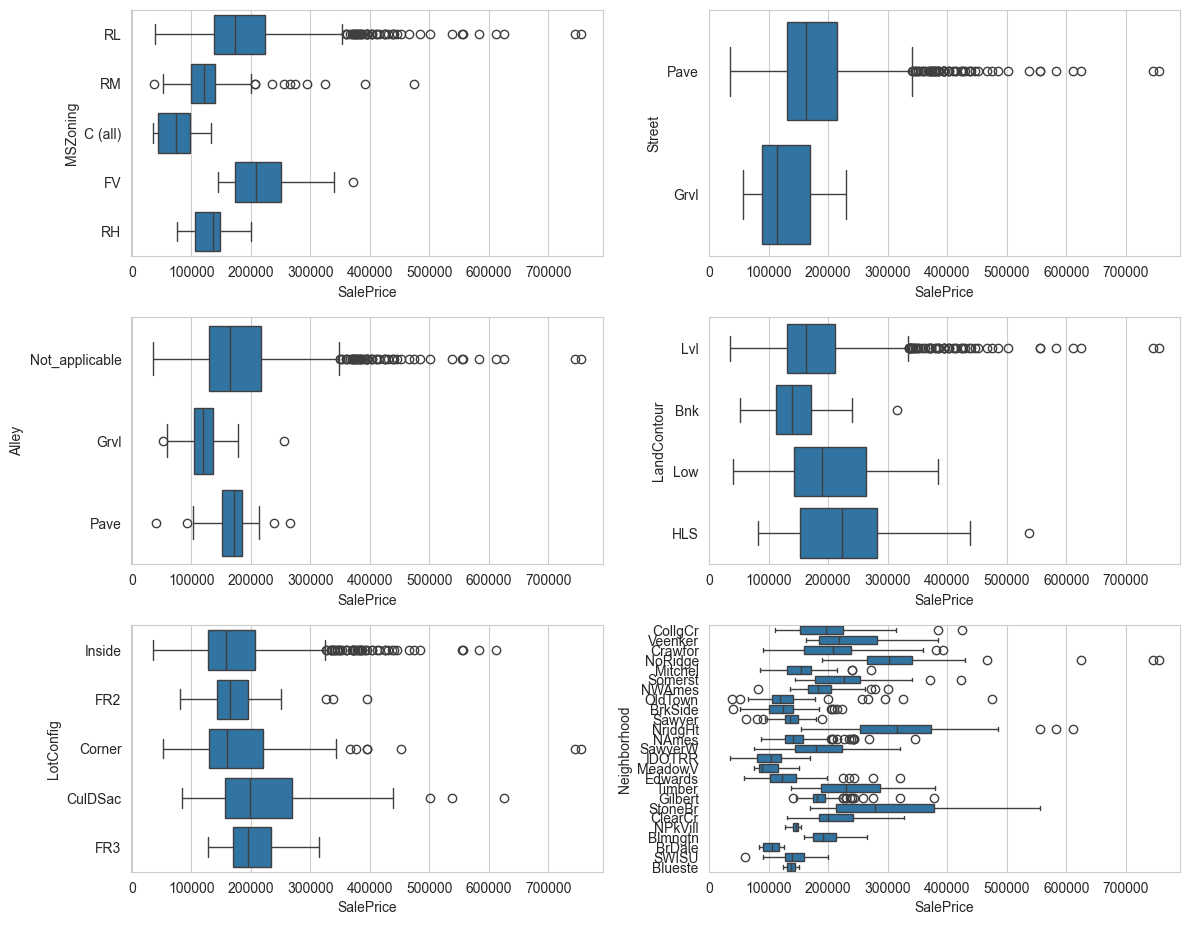

In [378]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

Observations:
1. Most of the houses doesn't have alley access.
2. Neighbourhood has a lot of labels.
3. Houses classified as Residential Low Density have higher SalePrice.

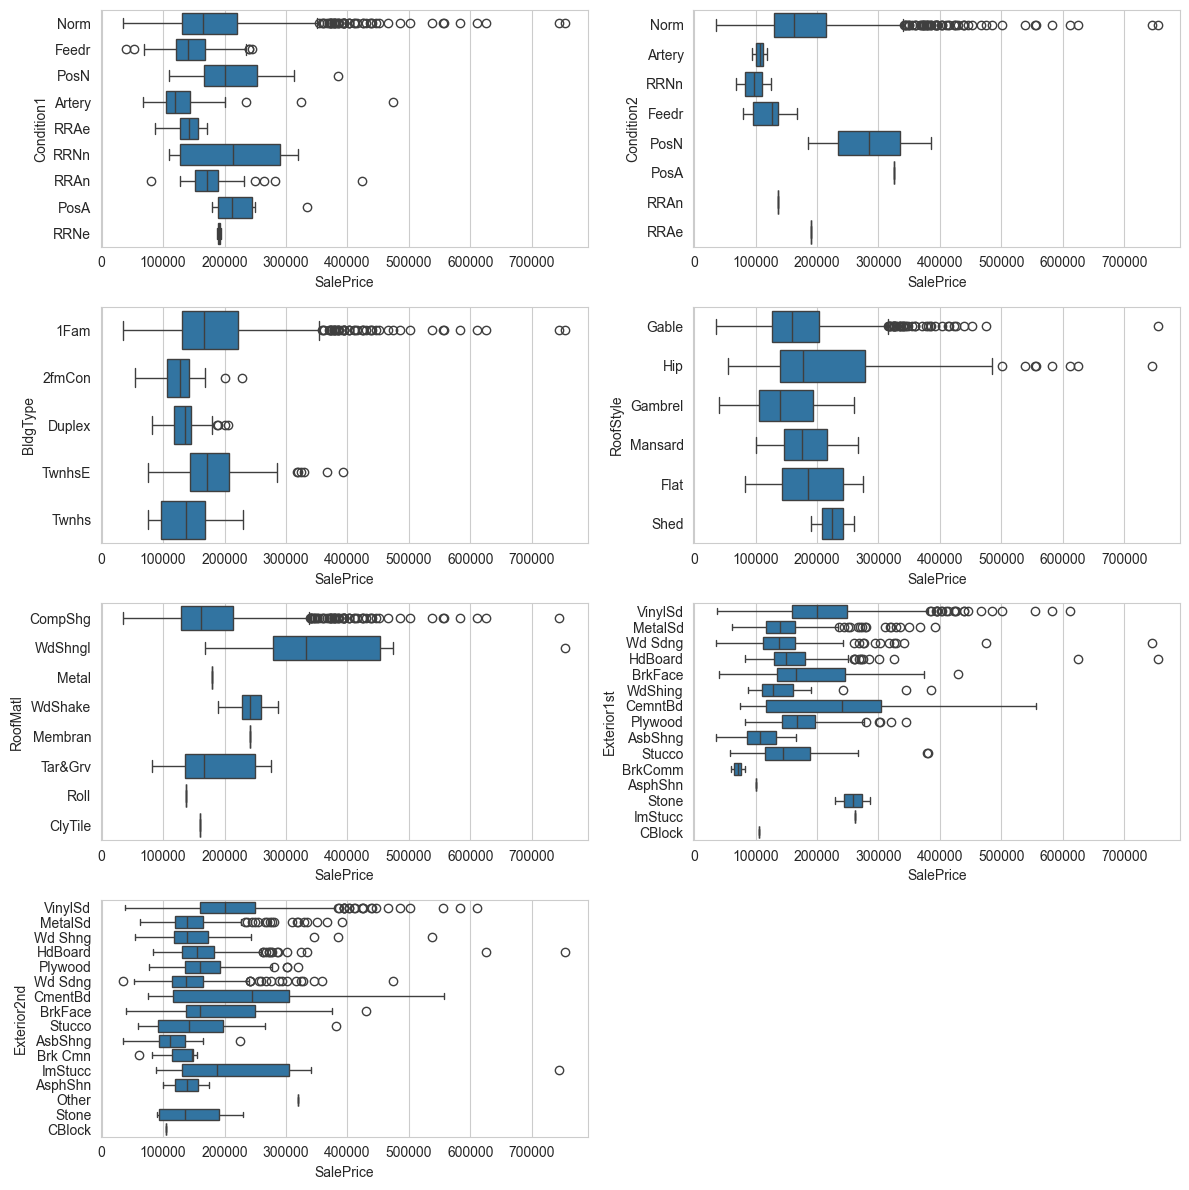

In [379]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

Observations:
1. Houses with Normal condition(Condition 1= Normal and Condition 2 =Normal) have higher SalePrice.
2. Features like RoofStyle, RoofMatl, Exterior1st, Exterior2nd have some labels with very few data, this labels cannot contributed in predicting salesprice.

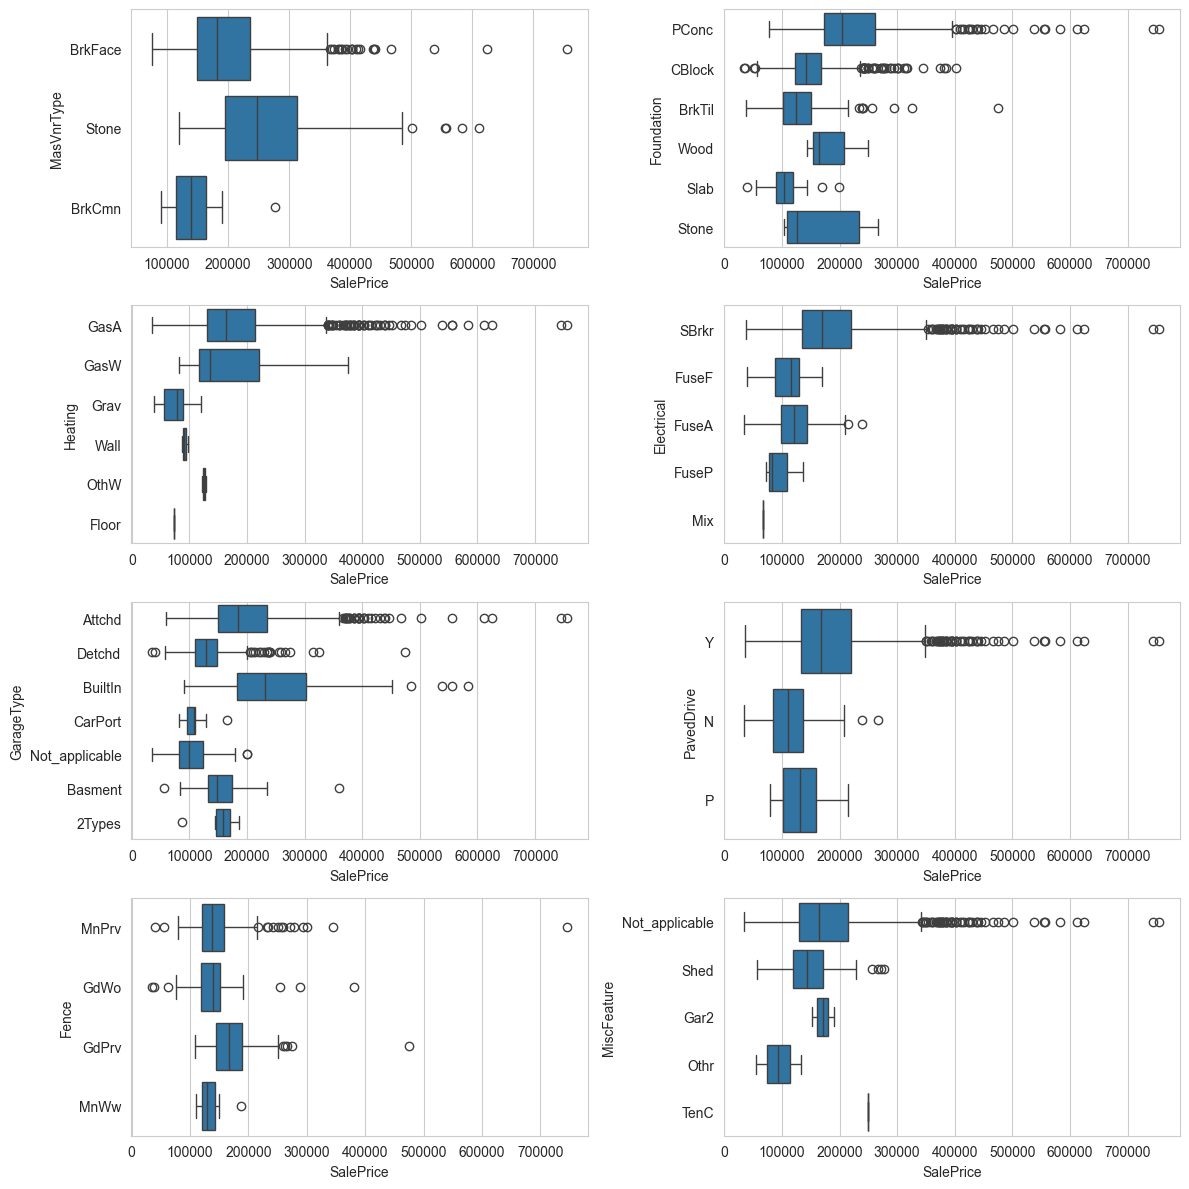

In [380]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

Observations:
1. Houses with BrkFace Masonry veneer type have higher SalePrice.
2. Houses with attached and built-in garage type have higher SalePrice.
3. Most of the houses do not have fence.

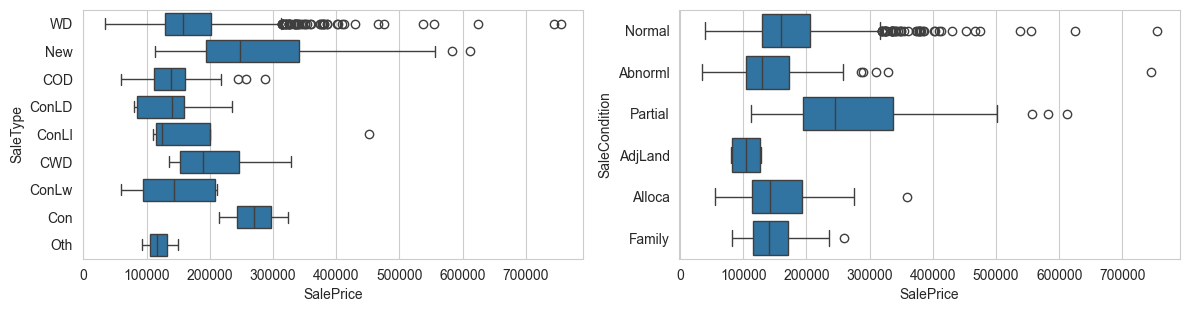

In [381]:
generate_boxplot(['SaleType','SaleCondition'])

Observations:
1. Houses with warranty deed have higher SalePrice.
2. Houses with normal sale condition have higher SalePrice.

Encoding the unordered categorical features

In [382]:
dummy_df = pd.get_dummies(housing[unordered_features], drop_first=True)

In [383]:
dummy_df.shape

(1451, 142)

In [384]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)

print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [385]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 45)


In [386]:
housing.shape

(1451, 68)

In [387]:
# Adding the dummy variables to the original dataframe
housing = pd.concat([housing,dummy_df], axis=1)

# Dropping the redundant columns
housing = housing.drop(unordered_features, axis=1)

In [388]:
housing.shape

(1451, 90)

### Step 4: Data Preparation

In [389]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Attchd  \
0           3            7          5.0       2003  ...               True   
1           0            6          7.5       1976  ...               True   
2           3            7          5.0       2001  ...               True   
3           3            7          5.0       1915  ...              False   
4           3            8          5.0       2000  ...               True   

   GarageType_BuiltIn  GarageType_Detchd  GarageType_Not_applicable  \
0               False              False                      False   
1               False              False                      False   
2               False              False                      False   
3               False               True                      False   
4               False              False                      False   

   PavedDrive_Y  Fence_MnPrv  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0          True        False         False         True                  True   
1          True        False         False         True                  True   
2          True        False         False         True                  True   
3          True        False         False         True                 False   
4          True        False         False         True                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 89 columns]

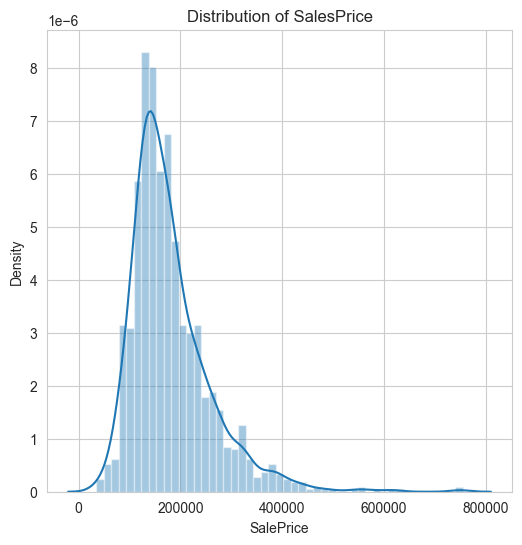

In [390]:
# Checking the distribution of the SalesPrice
plt.figure(figsize=(6, 6))
plt.title('Distribution of SalesPrice')
sns.distplot(housing['SalePrice'])
plt.show()

Observations:
Since SalesPrice is highly rightly skewed, we can apply log transformation to make it normally distributed.

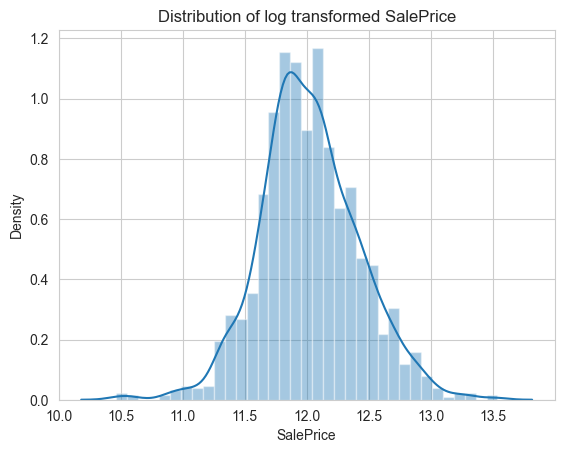

In [391]:
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [392]:
y = np.log(housing['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [393]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [394]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 89)
(436, 89)
(1015,)
(436,)


In [395]:
X['LotFrontage'].isnull().any()

True

In [396]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [397]:
X_train['LotFrontage'] = si.transform(X_train[['LotFrontage']])

In [398]:
X_test['LotFrontage'] = si.transform(X_test[['LotFrontage']])

Scaling the Features

In [399]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [400]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [401]:
x_train_scaled.head()

MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0   -0.682397    -1.620221 -1.336592  0.752218   0.031404  -0.218261   
1    0.924951     0.000000 -0.712130 -1.382454   0.031404  -0.218261   
2    1.728625    -0.279927 -1.116407 -1.382454   0.031404   3.473991   
3    0.657060     0.892830  1.069488  0.752218   0.031404  -0.218261   
4   -0.950289     0.501911 -0.072840 -1.382454   0.031404  -0.218261   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Attchd  \
0   -0.863197    -1.552452     1.520797  -1.881941  ...          -1.224745   
1    2.252908    -0.824292    -0.581497   0.236100  ...          -1.224745   
2   -0.863197     1.360189    -0.581497   1.211071  ...           0.816497   
3    2.772258    -0.824292    -0.581497  -0.200956  ...           0.816497   
4   -0.863197    -0.096131    -0.581497   1.143831  ...           0.816497   

   GarageType_BuiltIn  GarageType_Detchd  GarageType_Not_applicable  \
0           -0.259418           1.665303                   -0.23472   
1           -0.259418           1.665303                   -0.23472   
2           -0.259418          -0.600491                   -0.23472   
3           -0.259418          -0.600491                   -0.23472   
4           -0.259418          -0.600491                   -0.23472   

   PavedDrive_Y  Fence_MnPrv  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0      0.288521    -0.350411     -0.298422     0.390000              0.458010   
1      0.288521    -0.350411     -0.298422     0.390000              0.458010   
2      0.288521    -0.350411      3.350957    -2.564104             -2.183356   
3      0.288521    -0.350411     -0.298422     0.390000              0.458010   
4      0.288521    -0.350411     -0.298422     0.390000              0.458010   

   SaleCondition_Partial  
0              -0.302321  
1              -0.302321  
2               3.307745  
3              -0.302321  
4              -0.302321  

[5 rows x 89 columns]

In [402]:
X_test_scaled.head()

MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0    1.728625    -1.396838 -1.497743  0.752218   0.031404  -0.218261   
1   -0.950289     0.669448  0.458456  0.752218   0.031404  -0.218261   
2   -0.950289     0.000000  0.070685 -1.382454   0.031404  -0.218261   
3    2.398354    -0.782537 -1.088430  0.752218   0.031404  -0.218261   
4   -0.950289     0.501911  0.211972 -1.382454   0.031404  -0.218261   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Attchd  \
0   -0.863197    -0.824292    -0.581497   0.135241  ...           0.816497   
1   -0.863197     1.360189    -0.581497   1.143831  ...           0.816497   
2   -0.863197    -0.824292     1.520797  -0.436294  ...          -1.224745   
3    0.694855    -0.824292     0.469650  -2.016420  ...          -1.224745   
4   -0.863197    -0.824292     0.469650  -0.133717  ...           0.816497   

   GarageType_BuiltIn  GarageType_Detchd  GarageType_Not_applicable  \
0           -0.259418          -0.600491                  -0.234720   
1           -0.259418          -0.600491                  -0.234720   
2           -0.259418           1.665303                  -0.234720   
3           -0.259418          -0.600491                   4.260392   
4           -0.259418          -0.600491                  -0.234720   

   PavedDrive_Y  Fence_MnPrv  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0      0.288521     2.853795     -0.298422     0.390000              0.458010   
1      0.288521    -0.350411      3.350957    -2.564104             -2.183356   
2      0.288521    -0.350411     -0.298422     0.390000              0.458010   
3     -3.465952    -0.350411     -0.298422     0.390000              0.458010   
4      0.288521     2.853795     -0.298422     0.390000              0.458010   

   SaleCondition_Partial  
0              -0.302321  
1               3.307745  
2              -0.302321  
3              -0.302321  
4              -0.302321  

[5 rows x 89 columns]

### Step 5: Model Building

### Using RFE from sklearn

In [403]:
def top_n_features(n):
    top_n_cols = []

    linear_m = LinearRegression()
    linear_m.fit(x_train_scaled, y_train)
    rfe = RFE(linear_m, step=n)
    rfe = rfe.fit(x_train_scaled, y_train)

    print("Top %d features : " %n)
    rfe_ranking = list(zip(x_train_scaled.columns,rfe.support_,rfe.ranking_))

    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [404]:
# Checking top 40, 45 and 50 features
top_40 = top_n_features(40)
top_45 = top_n_features(45)
top_50 = top_n_features(50)

Top 40 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath

In [405]:
# # Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [406]:
build_regressor(x_train_scaled, y_train, top_40)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:32:32   Log-Likelihood:                 700.75
No. Observations:                1015   AIC:                            -1311.
Df Residuals:                     970   BIC:                            -1090.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [407]:
build_regressor(x_train_scaled, y_train, top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     223.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:32:44   Log-Likelihood:                 690.27
No. Observations:                1015   AIC:                            -1295.
Df Residuals:                     972   BIC:                            -1083.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [408]:
build_regressor(x_train_scaled, y_train, top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     223.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:32:52   Log-Likelihood:                 690.27
No. Observations:                1015   AIC:                            -1295.
Df Residuals:                     972   BIC:                            -1083.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

By inspecting the summary of the model, we can see that the adjusted R-square value is same for top 45, and top 50 features, and hence we can choose the optimum value of features to be top45.

In [409]:
X_train_rfe = x_train_scaled[top_45]
X_test_rfe = X_test_scaled[top_45]

In [410]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model,
                          param_grid = params,
                          scoring= 'neg_mean_absolute_error',
                          cv = 5,
                          return_train_score=True,
                          verbose = 1)
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)

  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

Ridge Regression

In [411]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9057185309874732
R2 score (test) :  0.9017184682601941
RMSE (train) :  0.12290894960001175
RMSE (test) :  0.12446126835963864


Lasso Regression

In [412]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9054220588593496
R2 score (test) :  0.9017354383932983
RMSE (train) :  0.12310204415573144
RMSE (test) :  0.12445052262015308


Comparing model coefficients

In [413]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.001)
LotArea                              0.040234             0.038282
OverallQual                          0.094401             0.097098
OverallCond                          0.044810             0.045685
YearBuilt                            0.024054             0.026235
YearRemodAdd                         0.014138             0.012993
BsmtFinType1                         0.011778             0.011132
BsmtFinSF1                           0.028071             0.028217
BsmtFinSF2                           0.000000             0.000000
HeatingQC                            0.012877             0.012072
CentralAir                           0.016852             0.016988
1stFlrSF                             0.130980             0.136397
2ndFlrSF                             0.107580             0.110587
BsmtFullBath                         0.016605             0.016636
BsmtHalfBath                         0.000000             0.000000
HalfBath                             0.011801             0.010056
KitchenQual                          0.013137             0.010881
Functional                          -0.023391            -0.023115
FireplaceQu                          0.020329             0.018416
GarageArea                           0.021002             0.019302
GarageQual                           0.013495             0.013324
MSZoning_RL                          0.029343             0.025509
MSZoning_RM                          0.004165            -0.000000
Neighborhood_Edwards                -0.019168            -0.018024
Neighborhood_NAmes                  -0.011532            -0.009653
Neighborhood_NWAmes                 -0.009396            -0.008412
Neighborhood_NridgHt                 0.014246             0.013482
Neighborhood_OldTown                -0.007684            -0.005602
Neighborhood_Somerst                 0.024120             0.022567
Condition1_Norm                      0.026242             0.026370
RoofStyle_Gable                     -0.007248            -0.004937
Exterior1st_HdBoard                 -0.004682            -0.004512
Exterior1st_MetalSd                  0.007031             0.004965
Exterior1st_VinylSd                  0.012571             0.011053
Exterior1st_Wd Sdng                 -0.013189            -0.006969
Exterior2nd_Plywood                  0.006603             0.004411
Exterior2nd_Wd Sdng                  0.009638             0.002033
Foundation_PConc                     0.022483             0.021913
GarageType_Attchd                    0.009931             0.005402
GarageType_Detchd                    0.006040             0.001392
GarageType_Not_applicable            0.002569            -0.000000
PavedDrive_Y                         0.010074             0.009150
SaleType_New                         0.038297             0.029268
SaleCondition_Normal                 0.029155             0.029762
SaleCondition_Partial               -0.009660            -0.000000

In [414]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[134711 239680 162537 125939 180477]


### Step 6: Final Model

Lasso Regression with alpha=0.001 is the best model with R2 score of 0.90 and RMSE of 0.124.

In [417]:
# 45 features ordered by feature importance in Lasso Regression
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
1stFlrSF                              0.136397
2ndFlrSF                              0.110587
OverallQual                           0.097098
OverallCond                           0.045685
LotArea                               0.038282
SaleCondition_Normal                  0.029762
SaleType_New                          0.029268
BsmtFinSF1                            0.028217
Condition1_Norm                       0.026370
YearBuilt                             0.026235
MSZoning_RL                           0.025509
Neighborhood_Somerst                  0.022567
Foundation_PConc                      0.021913
GarageArea                            0.019302
FireplaceQu                           0.018416
CentralAir                            0.016988
BsmtFullBath                          0.016636
Neighborhood_NridgHt                  0.013482
GarageQual                            0.013324
YearRemodAdd                          0.012993
HeatingQC                             0.012072
BsmtFinType1                          0.011132
Exterior1st_VinylSd                   0.011053
KitchenQual                           0.010881
HalfBath                              0.010056
PavedDrive_Y                          0.009150
GarageType_Attchd                     0.005402
Exterior1st_MetalSd                   0.004965
Exterior2nd_Plywood                   0.004411
Exterior2nd_Wd Sdng                   0.002033
GarageType_Detchd                     0.001392
GarageType_Not_applicable            -0.000000
SaleCondition_Partial                -0.000000
MSZoning_RM                          -0.000000
BsmtHalfBath                          0.000000
BsmtFinSF2                            0.000000
Exterior1st_HdBoard                  -0.004512
RoofStyle_Gable                      -0.004937
Neighborhood_OldTown                 -0.005602
Exterior1st_Wd Sdng                  -0.006969
Neighborhood_NWAmes                  -0.008412
Neighborhood_NAmes                   -0.009653
Neighborhood_Edwards                 -0.018024
Functional                           -0.023115

In [418]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea',
       'SaleCondition_Normal', 'SaleType_New', 'BsmtFinSF1', 'Condition1_Norm',
       'YearBuilt'],
      dtype='object')

In [419]:
# Top 10 features that are most important in predicting the SalePrice
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea',
       'SaleCondition_Normal', 'SaleType_New', 'BsmtFinSF1', 'Condition1_Norm',
       'YearBuilt'],
      dtype='object')

### Step 7: Conclusion

- We Read the housing data first and analysed it after dividing the features into numerical and categorical types.
- SalePrice is the target column here.
- Analyzed complete set of features with missing data handling, outlier detection and data cleaning. Also analyzed and observed the change of SalePrice w.r.t. individual features.
- New features are extracted, redundant features dropped and categorical features are encoded accordingly.
- Further the housing data is split into train and test data and also the feature scaling is performed
- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.
- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.
- Top 45 features are selected through RFE and adjusted R-square. 45 features : ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 20.0 for ridge and 0.001 for lasso model.
- Model evaluation is done with R2 score and Root Mean Square Error.
- Lasso Regression is chosen as final model for having slightly better R-square value on test data.
- Out of 45 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea', 'SaleCondition_Normal', 'SaleType_New', 'BsmtFinSF1', 'Condition1_Norm', 'YearBuilt']
- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.13697 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.
- Predicted value of SalePrice is tranformed into its original scale by performing antilog.

### Subjective Questions code

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [420]:
# The optimal values of alpha for
# Ridge is 20
# Lasso is 0.001

In [421]:
# After doubling the alpha for both ridge and lasso

# Model Building
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.905
R2 score (test) :  0.902
RMSE (train) :  0.1234
RMSE (test) :  0.1243


In [422]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9048
R2 score (test) :  0.9024
RMSE (train) :  0.1235
RMSE (test) :  0.124


In [423]:
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=20.0)  Lasso (alpha=0.001)  \
LotArea                              0.040234             0.038282   
OverallQual                          0.094401             0.097098   
OverallCond                          0.044810             0.045685   
YearBuilt                            0.024054             0.026235   
YearRemodAdd                         0.014138             0.012993   
BsmtFinType1                         0.011778             0.011132   
BsmtFinSF1                           0.028071             0.028217   
BsmtFinSF2                           0.000000             0.000000   
HeatingQC                            0.012877             0.012072   
CentralAir                           0.016852             0.016988   
1stFlrSF                             0.130980             0.136397   
2ndFlrSF                             0.107580             0.110587   
BsmtFullBath                         0.016605             0.016636   
BsmtHalfBath                         0.000000             0.000000   
HalfBath                             0.011801             0.010056   
KitchenQual                          0.013137             0.010881   
Functional                          -0.023391            -0.023115   
FireplaceQu                          0.020329             0.018416   
GarageArea                           0.021002             0.019302   
GarageQual                           0.013495             0.013324   
MSZoning_RL                          0.029343             0.025509   
MSZoning_RM                          0.004165            -0.000000   
Neighborhood_Edwards                -0.019168            -0.018024   
Neighborhood_NAmes                  -0.011532            -0.009653   
Neighborhood_NWAmes                 -0.009396            -0.008412   
Neighborhood_NridgHt                 0.014246             0.013482   
Neighborhood_OldTown                -0.007684            -0.005602   
Neighborhood_Somerst                 0.024120             0.022567   
Condition1_Norm                      0.026242             0.026370   
RoofStyle_Gable                     -0.007248            -0.004937   
Exterior1st_HdBoard                 -0.004682            -0.004512   
Exterior1st_MetalSd                  0.007031             0.004965   
Exterior1st_VinylSd                  0.012571             0.011053   
Exterior1st_Wd Sdng                 -0.013189            -0.006969   
Exterior2nd_Plywood                  0.006603             0.004411   
Exterior2nd_Wd Sdng                  0.009638             0.002033   
Foundation_PConc                     0.022483             0.021913   
GarageType_Attchd                    0.009931             0.005402   
GarageType_Detchd                    0.006040             0.001392   
GarageType_Not_applicable            0.002569            -0.000000   
PavedDrive_Y                         0.010074             0.009150   
SaleType_New                         0.038297             0.029268   
SaleCondition_Normal                 0.029155             0.029762   
SaleCondition_Partial               -0.009660            -0.000000   

                           Ridge (alpha = 40.0)  Lasso (alpha = 0.002)  
LotArea                                0.040861               0.038249  
OverallQual                            0.093708               0.098803  
OverallCond                            0.042980               0.043678  
YearBuilt                              0.021814               0.026624  
YearRemodAdd                           0.015512               0.014334  
BsmtFinType1                           0.011810               0.010611  
BsmtFinSF1                             0.028352               0.028596  
BsmtFinSF2                             0.000000               0.000000  
HeatingQC                              0.013472               0.012730  
CentralAir                             0.016949               0.016841  
1stFlrSF                               0.124790               0.134151  


In [424]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

Ridge (alpha=20.0)  Lasso (alpha=0.001)  Ridge (alpha = 40.0)  \
1stFlrSF             0.13098             0.136397               0.12479   

          Lasso (alpha = 0.002)  
1stFlrSF               0.134151

In [425]:
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(1)

Ridge (alpha=20.0)  Lasso (alpha=0.001)  Ridge (alpha = 40.0)  \
1stFlrSF             0.13098             0.136397               0.12479   

          Lasso (alpha = 0.002)  
1stFlrSF               0.134151

Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [426]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

Ridge (alpha=20.0)  Lasso (alpha=0.001)  Ridge (alpha = 40.0)  \
1stFlrSF               0.130980             0.136397              0.124790   
2ndFlrSF               0.107580             0.110587              0.101843   
OverallQual            0.094401             0.097098              0.093708   
OverallCond            0.044810             0.045685              0.042980   
LotArea                0.040234             0.038282              0.040861   

             Lasso (alpha = 0.002)  
1stFlrSF                  0.134151  
2ndFlrSF                  0.108058  
OverallQual               0.098803  
OverallCond               0.043678  
LotArea                   0.038249

In [427]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [428]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [429]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

print("Model Evaluation : Lasso Regression, alpha=0.001")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.001
R2 score (train) :  0.7938
R2 score (test) :  0.8094
RMSE (train) :  0.1818
RMSE (test) :  0.1733


In [430]:
lasso_model.coef_

array([ 0.07902717, -0.0035493 ,  0.04841261,  0.00604435,  0.05233099,
        0.        ,  0.02675125,  0.02007814, -0.00271445,  0.        ,
        0.04500714,  0.06261408, -0.01884277,  0.07142181,  0.08042222,
        0.00374681,  0.01693824,  0.        , -0.02015242, -0.01489683,
        0.00191486,  0.01663548, -0.        ,  0.01398153,  0.01697338,
       -0.02590942, -0.01216151,  0.        , -0.00623404, -0.02238244,
        0.        ,  0.01654999,  0.04108786,  0.        , -0.01593917,
        0.        ,  0.01297089,  0.02118326,  0.02239134])

In [431]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

Lasso
GarageArea   0.080422
LotArea      0.079027
FireplaceQu  0.071422
KitchenQual  0.062614
BsmtFinSF1   0.052331